In [1]:
import random
import string
import time
import tracemalloc
import matplotlib.pyplot as plt

In [2]:
def longest_palindrome(s):
    if len(s) < 2:
        return s

    n_str = '#' + '#'.join(s) + '#'
    p = [0] * len(n_str)
    mx, loc = 0, 0
    index, maxlen = 0, 0
    for i in range(len(n_str)):
        if i < mx and 2 * loc - i < len(n_str):
            p[i] = min(mx - i, p[2 * loc - i])
        else:
            p[i] = 1

        while p[i] + i < len(n_str) and i - p[i] >= 0 and n_str[
                i - p[i]] == n_str[i + p[i]]:
            p[i] += 1

        if i + p[i] > mx:
            mx = i + p[i]
            loc = i

        if p[i] > maxlen:
            index = i
            maxlen = p[i]
    s = n_str[index - p[index] + 1:index + p[index]]
    return s.replace('#', '')

def measurments(data):
    start = time.time()
    tracemalloc.start()
    longest_palindrome(data)
    end = time.time()
    runtimeIn = end - start
    current, peak = tracemalloc.get_traced_memory()
    print(f"The current memory usage is {current / 10**6}MB; Peak was {peak / 10**6}MB")
    tracemalloc.stop()
    print(f"The runtime is: {runtimeIn} sec")
    return runtimeIn, current/10**6


In [3]:
s = string.ascii_lowercase
seqRange = [500,1000,5000,10000,50000,100000,200000,500000]
cost = []
for i in range(8):
    print(f"{i+1}: for {seqRange[i]} items\n --------------------")
    string = ''.join(random.choice(s) for i in range(seqRange[i]))
    cost.append(measurments(string))

1: for 500 items
 --------------------
The current memory usage is 0.000544MB; Peak was 0.009782MB
The runtime is: 0.009000062942504883 sec
2: for 1000 items
 --------------------
The current memory usage is 0.000608MB; Peak was 0.01884MB
The runtime is: 0.016994237899780273 sec
3: for 5000 items
 --------------------
The current memory usage is 0.005911MB; Peak was 0.096175MB
The runtime is: 0.09446406364440918 sec
4: for 10000 items
 --------------------
The current memory usage is 0.001113MB; Peak was 0.181901MB
The runtime is: 0.1900005340576172 sec
5: for 50000 items
 --------------------
The current memory usage is 0.006256MB; Peak was 0.910915MB
The runtime is: 1.2849071025848389 sec
6: for 100000 items
 --------------------
The current memory usage is 0.005404MB; Peak was 1.809107MB
The runtime is: 1.7670986652374268 sec
7: for 200000 items
 --------------------
The current memory usage is 0.00522MB; Peak was 3.605716MB
The runtime is: 3.4830381870269775 sec
8: for 500000 items

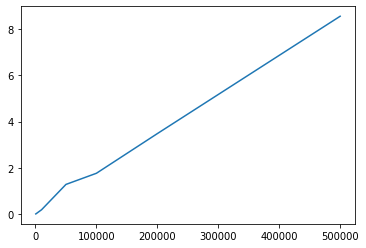

In [5]:
runtime, usage = map(list, zip(*cost))
plt.plot(seqRange,runtime)


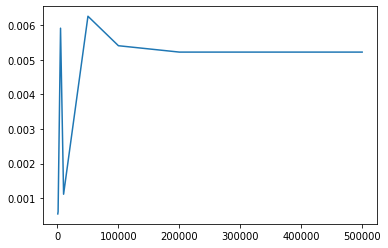

In [6]:
plt.plot(seqRange,usage)